In [24]:
import pandas as pd
from scripts.testing.evaluate_reports import TrafficReportEvaluator
from scripts.testing.helper_functions import *

In [25]:
results_to_csv = False
full_test_set = True

In [26]:
results_file = '../outputs/test-results-GaMS-2B-Instruct-v6-4096-MERGED-eval.csv'

output_file = '../outputs/test-results-GaMS-2B-Instruct-v6-4096-MERGED-eval-scores.csv'

In [27]:
df = pd.read_csv(results_file)

In [28]:
if not full_test_set:
    df = df.head(50)

In [29]:
generated = df['predicted'].tolist()
references = df['target'].tolist()

In [30]:
evaluator = TrafficReportEvaluator()

In [31]:
labse_paragraph_results = evaluator.labse_paragraph_scores(generated, references)

In [32]:
labse_results = evaluator.labse_scores(generated, references)

In [33]:
named_entity_results = evaluator.named_entity_evaluation(generated, references, lemmatize=True, extended=True)

error
error


In [34]:
bertscore_results = evaluator.bert_scores(generated, references)

In [35]:
length_average_diff, length_results = evaluator.length_diff(generated, references, abs=True)

In [36]:

df['LaBSE p'] = labse_paragraph_results
df['LaBSE'] = labse_results

df['NE F1'] = named_entity_results['f1']
df['NE P'] = named_entity_results['precision']
df['NE R'] = named_entity_results['recall']

df['BS F1'] = bertscore_results['bertscore_f1'].tolist()
df['BS P'] = bertscore_results['bertscore_precision'].tolist()
df['BS R'] = bertscore_results['bertscore_recall'].tolist()

df['Len diff'] = length_results

In [37]:
if results_to_csv:
    df.to_csv(output_file, index=False)
    print(f"Updated dataset saved to {output_file}")

In [38]:
# df.round(3)

In [39]:
print("          average   median")
for col in df.columns[3:]:
    print(f"{col:<10}| {column_average_score(df, column_name=col):.3f} | {column_median_score(df, column_name=col):.3f}")

          average   median
LaBSE p   | 0.706 | 0.708
LaBSE     | 0.772 | 0.796
NE F1     | 0.280 | 0.267
NE P      | 0.293 | 0.261
NE R      | 0.317 | 0.300
BS F1     | 0.903 | 0.904
BS P      | 0.904 | 0.909
BS R      | 0.904 | 0.904
Len diff  | 0.489 | 0.333


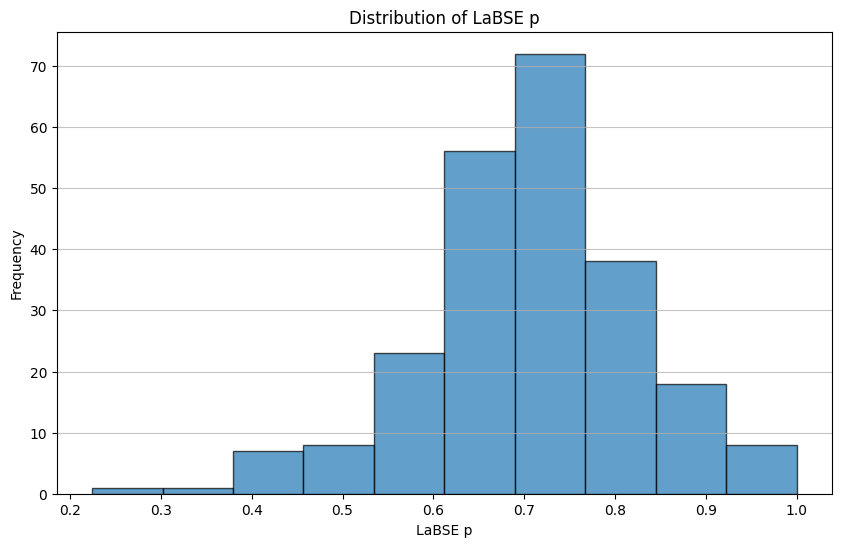

In [47]:
plot_column_distribution(df, column_name='LaBSE p', bins=10)

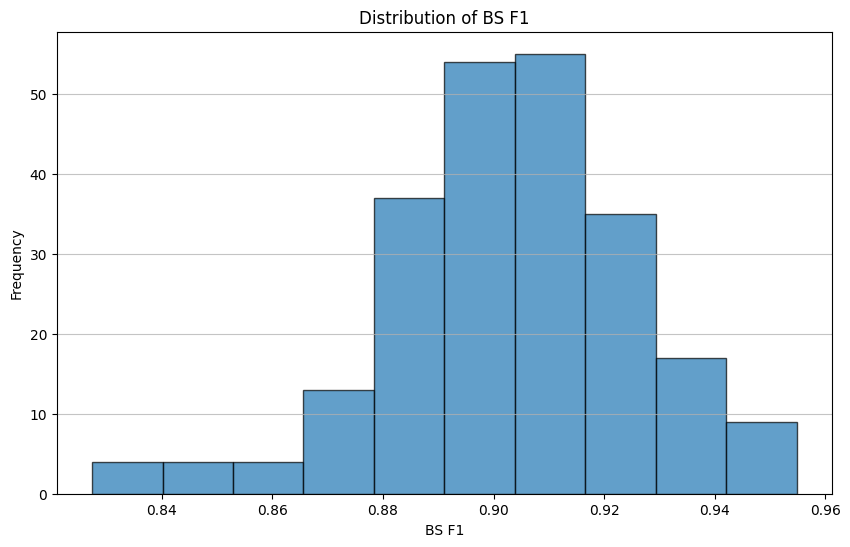

In [40]:
plot_column_distribution(df, column_name='BS F1', bins=10)

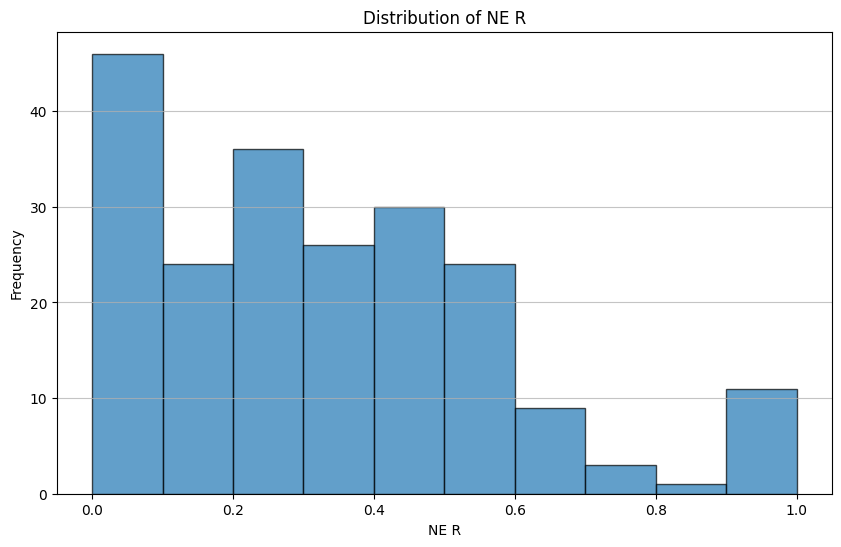

In [41]:
plot_column_distribution(df, column_name='NE R', bins=10)

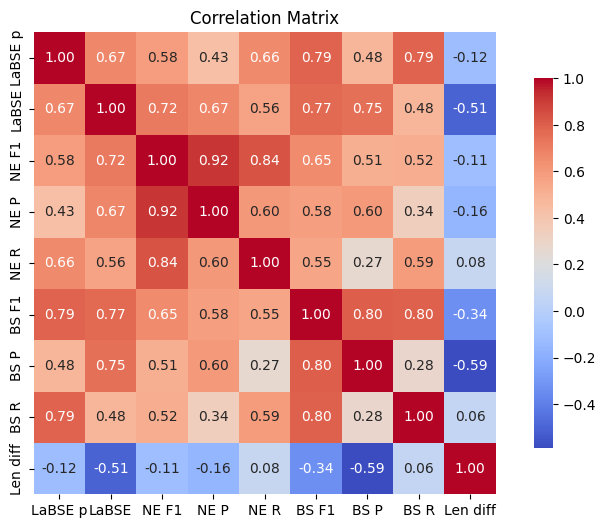

In [42]:
plot_correlation_matrix(df)

In [49]:
best_rows_paragraph_labse = find_and_print_n_reports(df, n=5, column_name='LaBSE p', sort='desc')

metric: LaBSE p, n: 5
---------------------------------------------------------
Score: 1.0000001192092896, Index: 86
Podatki o prometu. 

 Na štajerski avtocesti proti Ljubljani je zaradi pokvarjenega vozila promet oviran med priključkoma Šentrupert in Vransko. 

 Na primorski avtocesti proti Ljubljani je zaradi del zaprt vozni pas med priključkoma Kozina in Divača. 

 Do 22-ih velja omejitev prometa tovornih vozil, katerih največja dovoljena masa presega 7 ton in pol.
--------


 Podatki o prometu. 

 Do 22-ih velja omejitev prometa tovornih vozil, katerih največja dovoljena masa presega 7 ton in pol.



---------------------------------------------------------
Score: 0.9999998807907104, Index: 179
Podatki o prometu. 

 Na primorski avtocesti je zaradi pokvarjenega tovornjaka oviran promet med priključkom Brezovica in razcepom Kozarje proti Ljubljani. 

 Cesta čez prelaz Vršič je prevozna samo za osebna vozila z verigami.
--------


 Podatki o prometu.  

 Cesta čez prelaz Vršič je pr

In [44]:
best_rows_labse = find_and_print_n_reports(df, n=2, column_name='LaBSE', sort='desc')

metric: LaBSE, n: 2
---------------------------------------------------------
Score: 0.9271453619003296, Index: 228
Podatki o prometu. 

 Na štajerski avtocesti proti Ljubljani je zaradi prometne nesreče zaprt prehitevalni pas med priključkoma Celje-vzhod in Celje-center. 

 Zaradi del je na primorski avtocesti oviran promet med priključkoma Brezovica in Vrhnika v obe smeri.
--------


 Podatki o prometu. 

 Na štajerski avtocesti med priključkoma Celje-vzhod in Celje-center proti Ljubljani je zaradi nesreče oviran promet. 

 Okvarjeno vozilo ovira promet na primorski avtocesti med Vrhniko in Logatcem proti Kopru. 

 



---------------------------------------------------------
Score: 0.921958863735199, Index: 159
Podatki o prometu. 

 Zaradi burje je primorska avtocesta zaprta med priključkoma Kastelec in Kozina proti Ljubljani. Obvoz je po vzporedni regionalni cesti med obema priključkoma.  

 Prav tako zaradi burje je na vipavski hitri cesti med razcepom Nanos in priključkom Selo pr

In [45]:
best_rows_bs_f1 = find_and_print_n_reports(df, n=3, column_name='BS F1', sort='desc')

metric: BS F1, n: 3
---------------------------------------------------------
Score: 0.9547942876815796, Index: 169
Podatki o prometu. 

 Zaradi burje je na vipavski hitri cesti med Selom in razcepom Nanos prepovedan promet za hladilnike in vozila s ponjavami, lažja od 8 ton. 

 Na cesti Col-Črni Vrh-Godovič je prepovedan promet za tovorna vozila s priklopniki in polpriklopnike. 

 Cesta čez prelaz Vršič je prevozna samo za osebna vozila z verigami. 

 
--------


 Podatki o prometu.  

 Na vipavski hitri cesti je zaradi pokvarjenega vozila oviran promet med Selom in Ajdovščino proti Ljubljani. 

 Na regionalni cesti Col-Črni Vrh-Godovič je prepovedan promet za tovorna vozila s priklopniki in polpriklopnike. 

 Cesta čez prelaz Vršič je prevozna samo za osebna vozila z verigami.



---------------------------------------------------------
Score: 0.9525744915008545, Index: 130
Podatki o prometu. 

 Na dolenjski avtocesti proti Obrežju je zaradi nesreče zaprt vozni pas med priključkoma D

In [46]:
best_rows_ne_r = find_and_print_n_reports(df, n=3, column_name='NE F1', sort='desc')

metric: NE F1, n: 3
---------------------------------------------------------
Score: 0.8, Index: 168
Podatki o prometu. 

 Zaradi burje je na primorski avtocesti med priključkoma Kastelec in Kozina v obe smeri prepovedan promet za počitniške prikolice, hladilnike in vozila s ponjavami. 

 Na cesti Col-Črni Vrh-Godovič je prepovedan promet za tovorna vozila s priklopniki in za polpriklopnike. 

 Cesta čez prelaz Vršič je prevozna samo za osebna vozila z verigami.
--------


 Podatki o prometu.  

 Na regionalni cesti Col-Črni Vrh-Godovič je prepovedan promet za tovorna vozila s priklopniki in polpriklopnike. 

 Cesta čez prelaz Vršič je prevozna samo za osebna vozila z verigami. 

 Primorska avtocesta proti Ljubljani je med priključkoma Kastelec in Kozina spet prevozna.



---------------------------------------------------------
Score: 0.75, Index: 145
Podatki o prometu. 

 Na štajerski avtocesti proti Mariboru je zaradi pokvarjenega vozila promet oviran med priključkoma Šempeter in Ža